In [179]:
import numpy as np
import pandas as pd
d=pd.read_csv('hour.csv')
d.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [180]:
d=d.drop(["registered"],axis=1)

In [181]:
d.shape

(17379, 16)

In [182]:
x= d.iloc[:,2:15]
y = d.iloc[:,15:16]

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)
from sklearn.linear_model import LinearRegression
l = LinearRegression()
#from sklearn.tree import DecisionTreeClassifier
l=l.fit(x_train,y_train)
#dt=dt.fit(x_train,y_train)
y_pred=l.predict(x_test)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)
print(r)
lco=l.coef_[0]



0.6110182475619614


In [184]:
from sklearn.model_selection import KFold,cross_val_score
k = KFold(n_splits=3,shuffle=True)
#print("For Linear Regression with {} -fold cross validation.".format(a))
for train,test in k.split(d):
    x_train=x.iloc[train,:]
    x_test=x.iloc[test,:]
    y_train=y.iloc[train,:]
    y_test=y.iloc[test,:]
    l = l.fit(x_train,y_train)
    y_pred = l.predict(x_test)
    #mean = mean_squared_error(y_test,y_pred)
    #mean_ab = mean_absolute_error(y_test,y_pred)
    #med_ab = median_absolute_error(y_test,y_pred)
    #r = r2_score(y_test,y_pred)
    c=cross_val_score(l,y_test,y_pred,cv=3)
    print(c)

[0.55337428 0.53654932 0.45575395]
[0.5651418  0.58450209 0.48001525]
[0.55914569 0.5407936  0.46574387]


In [185]:
from sklearn.feature_selection import VarianceThreshold
v=VarianceThreshold(threshold = 0.25)
v.fit(x)
va=v.get_support()
colm=list(x)
for i in range(0,13):
    if(va[i]==False):
        x=x.drop([colm[i]],axis=1)
        print(colm[i])
x
    

yr
holiday
workingday
temp
atemp
hum
windspeed


,season,mnth,hr,weekday,weathersit,casual
0,1,1,0,6,1,3
1,1,1,1,6,1,8
2,1,1,2,6,1,5
3,1,1,3,6,1,3
4,1,1,4,6,1,0
...,...,...,...,...,...,...
17374,1,12,19,1,2,11
17375,1,12,20,1,2,8
17376,1,12,21,1,1,7
17377,1,12,22,1,1,13


In [186]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
l1=Lasso()
l2=Ridge()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)
l1 = l1.fit(x_train,y_train)
l2 = l2.fit(x_train,y_train)
y_pred=l1.predict(x_test)
y_pred=l2.predict(x_test)
rl1=r2_score(y_test,y_pred)
rl2=r2_score(y_test,y_pred)
print(rl1)
print(rl2)




0.54815068333259
0.54815068333259


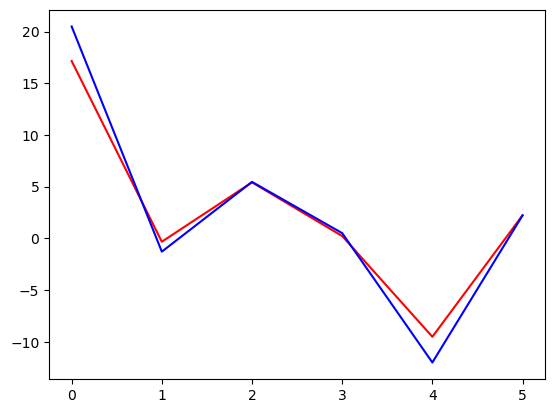

In [187]:
l2co=l2.coef_[0]
import matplotlib.pyplot as plt
plt.plot(l1.coef_,color="red",label="Lasso")
plt.plot(l2co,color="blue",label="Ridge")
plt.show()